<a href="https://colab.research.google.com/github/luctiz/Grupo43-TP2/blob/master/TensorFlow_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

# CARGO LOS SETS DE DATOS

In [0]:
mexico_housing_dataframe = pd.read_csv("https://metadata.fundacionsadosky.org.ar/media/navent/train.csv", sep=",")

In [0]:
test =  pd.read_csv("https://metadata.fundacionsadosky.org.ar/media/navent/test.csv", sep=",")
train = mexico_housing_dataframe
ejemplo = pd.read_csv("https://metadata.fundacionsadosky.org.ar/media/navent/ejemploRespuesta.csv", sep=",")

# UTILIZO LA MISMA LIMPIEZA QUE OTROS ANALISIS 

In [0]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

train=train.fillna(0)
test=test.fillna(0)

In [0]:
mexico_housing_dataframe = train

# MODELO DE ENTRENAMIENTO CON UN FEATURE - TENSOR FLOW

In [77]:
#Realizo una permutacion para el análisis de las filas (Aleatorios)
mexico_housing_dataframe = mexico_housing_dataframe.reindex(np.random.permutation(mexico_housing_dataframe.index))
mexico_housing_dataframe["precio"] /= 1000.0
mexico_housing_dataframe

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
4992,102456,lomas de tzompantle,"linda casa en condominio, areas comunes con he...",Casa en condominio,LOMAS DE TZOMPANTLE,Cuernavaca,Morelos,0,3,1,1,82,58,65528.0,0.0,0.0,2015-12-18 00:00:00,0,0,0,0,0,980.0
20727,166387,venta. remate hipotecario. casa en iztacalco!!...,venta. remate hipotecario. casa en iztacalco!!...,Casa,NORTE,Iztacalco,Distrito Federal,10,3,0,2,174,339,24107.0,0.0,0.0,2015-09-20 00:00:00,0,0,0,0,0,2900.0
49225,118127,"excelente departamento en venta, twin towers","<p>en 246 m, tres recamaras con ba&ntilde;o y ...",Apartamento,Bosque de Minas,Huixquilucan,Edo. de México,15,3,3,3,246,177,55570.0,19.4,-99.3,2013-02-07 00:00:00,1,1,1,1,1,4250.0
82238,157793,departamento residencial en venta en isla de ...,"<p>hermoso departamento en venta, en muy buen ...",Apartamento,-,Huixquilucan,Edo. de México,4,3,2,3,272,272,55520.0,0.0,0.0,2014-05-27 00:00:00,0,0,0,0,0,6000.0
32076,85622,terreno satelite acueducto,<p>terreno ascendente muy bien ubicado con her...,Terreno,montecarlo,Monterrey,Nuevo León,0,3,2,2,174,202,0.0,25.6,-100.3,2016-03-16 00:00:00,0,0,0,1,0,1030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175069,278746,"confortable casa cerca de parques, areas verde...","<p>confortable casa cerca de parques, areas ve...",Casa,-,Altamira,Tamaulipas,0,3,2,2,104,130,104852.0,22.4,-97.9,2013-10-29 00:00:00,0,0,0,0,0,830.0
154269,59806,casa en venta una planta en bosques del rejon,<p>casa en venta en fraccionamiento privado co...,Casa,Bosques del Rejon,Chihuahua,Chihuahua,1,2,2,3,300,400,0.0,0.0,0.0,2016-10-20 00:00:00,0,0,0,0,0,4300.0
177353,57338,casa en infonavit buena vista perfecta para of...,casa de dos pisos que cuenta en planta alta co...,Casa,INFONAVIT BUENA VISTA,Veracruz,Veracruz,5,3,0,1,88,60,107947.0,0.0,0.0,2016-09-02 00:00:00,0,0,0,0,0,525.0
25153,120293,excelente remate bancario en nativitas benito ...,cesión de derechos de departamento ubicado en ...,Apartamento,"Nativitas, Benito Juarez",Benito Juárez,Distrito Federal,10,2,1,1,74,74,23545.0,19.4,-99.1,2014-10-04 00:00:00,0,0,0,0,0,1050.0


FUNCION DE ENTRADA

In [0]:
def my_input_fn(features, targets, batch_size, shuffle=True, num_epochs=None):
    
    # Conversion de  pandas data  a dict de np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    # Construyo un dataset, y configuro batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # Peligro: 2GB es el limite
    ds = ds.batch(batch_size).repeat(num_epochs)
    # Shuffle los dato en caso de especificarlo
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    # Retorno el proximo lote de datos.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

FUNCION DE ENTRENAMIENTO

In [0]:
def train_model(learning_rate, steps, batch_size, input_feature="habitaciones"):
    #SE EJECUTAN 10 PERIODOS DE PRUEBAS CON RELACION A LOS HYPERPARAMETROS QUE SE PASAN
    periods = 100
    steps_per_period = steps / periods
    # Definicion de los features de entrada: habitaciones
    my_feature = mexico_housing_dataframe[["habitaciones"]]
    # Configure una columna numerica para habitaciones
    feature_columns = [tf.feature_column.numeric_column("habitaciones")]

    # Definicion del Label ( targets )
    targets = mexico_housing_dataframe["precio"]

    prediction_input_fn = lambda: my_input_fn(my_feature, targets,batch_size=1, num_epochs=1, shuffle=False)

    # Utilizacion de 'Gradient Descent' par la optimización del modelo /////PODRIA CAMBIARSE PERO ES UNA HERRAMIENTA DE TF
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate) #ESTE ARGUMENTO SE PASA (RANGO DE APRENDIZAJE)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

    # Configuracion de 'regresion lineal' para el modelo con nuestroa columnda de feature y optimizador.
    # Seteo rango de aprendizaje de 0.0000001 para el 'Gradient Descent'.

    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=feature_columns,
        optimizer=my_optimizer
    )

    # Visualizacion de aprendizaje por periodo.
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Linea de aprendizaje por Periodo")
    plt.ylabel("precio")
    plt.xlabel("habitaciones")
    sample = mexico_housing_dataframe.sample(n=300)
    plt.scatter(sample["habitaciones"], sample["precio"])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  #ENTRENAMIENTO DEL MODELO=====================================================
    
    print("Entrenando Modelo...")
    print("RMSE (en Data):")
    root_mean_squared_errors = []
    for period in range (0, periods):
      linear_regressor.train(
        input_fn = lambda:my_input_fn(my_feature, targets, batch_size=1),
        steps=steps_per_period
        )
      # REALIZO PREDICCION
      # Llamo a  predict() en linear_regressor para hacer predicciones.
      predictions = linear_regressor.predict(input_fn=prediction_input_fn)
      # Formateo las predicciones como un NumPy array, para poder calcular metricas.
      predictions = np.array([item['predictions'][0] for item in predictions])
      # Computar perdida.
      root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
      root_mean_squared_errors.append(root_mean_squared_error)
      # Imprimir la perdida actual.
      print("  Periodo %02d : %0.2f" % (period, root_mean_squared_error))

      y_extents = np.array([0, sample["precio"].max()])
    
      weight = linear_regressor.get_variable_value('linear/linear_model/habitaciones/weights')[0]
      bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

      x_extents = (y_extents - bias) / weight
      x_extents = np.maximum(np.minimum(x_extents,
                                      sample["habitaciones"].max()),
                           sample["habitaciones"].min())
      y_extents = weight * x_extents + bias
      plt.plot(x_extents, y_extents, color=colors[period]) 
 
    print("Final de entrenamiento.")
    # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periodos')
    plt.title("Error cuadratico Medio vs. Periodos")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)

    # Output a table with calibration data.
    calibration_data = pd.DataFrame()
    calibration_data["predictions"] = pd.Series(predictions)
    calibration_data["targets"] = pd.Series(targets)
    display.display(calibration_data.describe())

    print("Resultado final  RMSE (sobre los datos): %0.2f" % root_mean_squared_error)

EJECUTO ENTRENAMIENTO Y ANALIZO ERROR 

Entrenando Modelo...
RMSE (en Data):
  Periodo 00 : 3315.26
  Periodo 01 : 2146.86
  Periodo 02 : 2214.83


KeyboardInterrupt: ignored

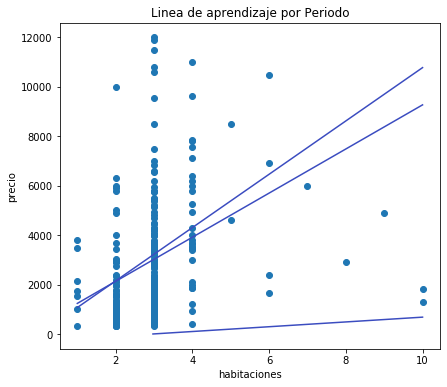

In [81]:
#ACLARACION: SE UTILIZA COMO FEATURE EL NUMERO DE HABITACIONES
train_model(
    learning_rate=0.0001,  #AJUSTES DE HYPERPARAMETROS
    steps=5000,
    batch_size=5
)

# MODELO PARA VARIOS FEATURES - TENSOR FLOW

In [0]:
#LUEGO DE LA LIMPIEZA DE DATOS
mexico_housing_dataframe = train

In [0]:
#PREPOCESAMIENTO DE DATOS

def preprocess_features(california_housing_dataframe):
  selected_features = california_housing_dataframe[
    ["antiguedad",
     "habitaciones",
     "garages",
     "banos",
     "metroscubiertos",
     "metrostotales",
     "lat",
     "lng"]]
  processed_features = selected_features.copy()
  # Creacion de un feature Sintetico.
  processed_features["extras"] = (
    mexico_housing_dataframe["gimnasio"] +
    mexico_housing_dataframe["usosmultiples"] +
    mexico_housing_dataframe["centroscomercialescercanos"] +
    mexico_housing_dataframe["escuelascercanas"] +
    mexico_housing_dataframe["piscina"] )
  return processed_features

def preprocess_targets(mexico_housing_dataframe):
  output_targets = pd.DataFrame()
  # Escalar a unidades de miles la moneda.
  output_targets["precio"] = (
    mexico_housing_dataframe["precio"] / 1000.0)
  return output_targets

CONJUNTO DE VALIDACION

In [0]:
training_examples = preprocess_features(mexico_housing_dataframe.head(168000))
training_targets = preprocess_targets(mexico_housing_dataframe.head(168000))
validation_examples = preprocess_features(mexico_housing_dataframe.tail(72000))
validation_targets = preprocess_targets(mexico_housing_dataframe.tail(72000))

FUNCIONES DE ENTRADAS

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    # Convertir pandas a un listado de numpy .
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construyendo un dataset, y configurando batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # El limite es de 2GB
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Mezclar Datos, si se especifica.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return del proximo batch de datos.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

FUNCION PARA ENTRADA DE VARIOS FEATURES

In [0]:
def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

FUNCION DE ENTRENAMIENTO DEL MODELO

In [0]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets,
    periods):
  
  steps_per_period = steps / periods
  
  # Regresion Lineal.=====GRADIENT DESCENT======================================
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # Configuracion de Funciones de Entrada.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["precio"], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["precio"], 
      num_epochs=1, 
      shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets["precio"], 
      num_epochs=1, 
      shuffle=False)

  # Entrenamiento del Modelo==================================================== 
  print("Entrenando Modelo...")
  print("RMSE (en el set de datos):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Entrenando modelo comenzando por el primer Periodo
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Realizando Computos.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    
    # Validacion de Perdida.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Imprimir la Perdida actual .
    print("  Periodo %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Añadir las metricas de Perdida a la muestra.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Entrenamiento Finalizado.")

  # GRAFICANDO LAS METRICAS PARA CADA PERIODO===================================
  plt.ylabel("RMSE")
  plt.xlabel("Periodos")
  plt.title("Raiz del Error Cuadràtico Medio vs. Periodos")
  plt.tight_layout()
  plt.plot(training_rmse, label="Entrenando")
  plt.plot(validation_rmse, label="Validando")
  plt.legend()

  return linear_regressor

Training model...
RMSE (on training data):
  Periodo 00 : 3300.18
  Periodo 01 : 3282.94
  Periodo 02 : 3265.72
  Periodo 03 : 3248.54
  Periodo 04 : 3231.41
  Periodo 05 : 3214.32
  Periodo 06 : 3197.28
  Periodo 07 : 3180.26
  Periodo 08 : 3163.28
  Periodo 09 : 3146.35
  Periodo 10 : 3129.46
  Periodo 11 : 3112.61
  Periodo 12 : 3095.81
  Periodo 13 : 3079.05
  Periodo 14 : 3062.31
  Periodo 15 : 3045.65
  Periodo 16 : 3029.03
  Periodo 17 : 3012.44
  Periodo 18 : 2995.93
  Periodo 19 : 2979.45
  Periodo 20 : 2963.00
  Periodo 21 : 2946.61
  Periodo 22 : 2930.28
  Periodo 23 : 2914.01
  Periodo 24 : 2897.78
  Periodo 25 : 2881.59
  Periodo 26 : 2865.45
  Periodo 27 : 2849.38
  Periodo 28 : 2833.37
  Periodo 29 : 2817.42
  Periodo 30 : 2801.52
  Periodo 31 : 2785.69
  Periodo 32 : 2769.91
  Periodo 33 : 2754.20
  Periodo 34 : 2738.55
  Periodo 35 : 2722.99
  Periodo 36 : 2707.46
  Periodo 37 : 2692.01
  Periodo 38 : 2676.62
  Periodo 39 : 2661.39
  Periodo 40 : 2646.19
  Periodo 41 :

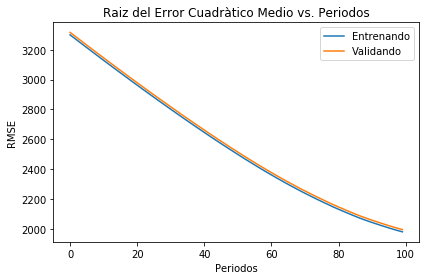

In [89]:
linear_regressor = train_model(
    learning_rate=0.00003,
    steps=50000,
    batch_size=5,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets,
    periods=100)